<a href="https://colab.research.google.com/github/bhuwich/Tensorflow/blob/main/SimpleTensorflowClassificationProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.9.2


In [ ]:
(x_train, t_train), (x_tst,t_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_0 = np.random.randn(1000,2)
x_1 = np.random.randn(1000,2) + 2
x = np.append(x_0,x_1, axis=0)
t = np.array([-1]*1000 + [1]*1000)
x.shape, t.shape

((2000, 2), (2000,))

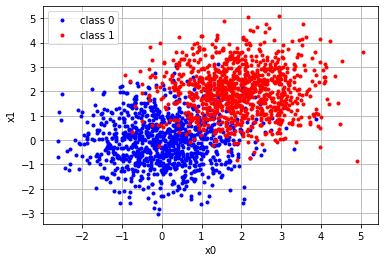

In [ ]:
plt.plot(x[t==-1,0], x[t==-1,1],'b.')
plt.plot(x[t==1,0], x[t==1,1],'r.')
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(['class 0','class 1'])

In [ ]:
class Mylayer(tf.keras.layers.Layer):
  def __init__(self):
    super(Mylayer,self).__init__()
    self.w0 = tf.Variable(np.random.randn(1), dtype=np.float32)
    self.w1 = tf.Variable(np.random.randn(1), dtype=np.float32)
    self.b = tf.Variable(np.random.randn(1), dtype=np.float32)

  def call(self,x):
    return x[:,0:1]*self.w0 + x[:,1:2]*self.w1 + self.b


In [ ]:
inputs = tf.keras.Input(shape=(2,))
net = Mylayer()(inputs)
y = tf.keras.layers.Activation('tanh')(net)

model = tf.keras.Model(inputs=inputs, outputs=y)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 mylayer_3 (Mylayer)         (None, 1)                 3         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_4')>

In [ ]:
model.predict(x)

63/63 [==============================] - 0s 1ms/step


array([[-0.70446175],
       [-0.41210565],
       [-0.85333276],
       ...,
       [ 0.6424914 ],
       [-0.6537108 ],
       [ 0.7858951 ]], dtype=float32)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate =0.1, momentum=0.9)
loss_func = tf.keras.losses.MeanSquaredError()

In [ ]:
t = np.reshape(t,(2000,1))


In [ ]:
epochs = 1000
for epoch in range (epochs):
  with tf.GradientTape() as tape:
    y = model(x)
    loss = loss_func(t,y)
  gradients = tape.gradient(loss, model.trainable_variables)# หา gradient

  optimizer.apply_gradients( zip(gradients, model.trainable_variables)) #ปรับ weight
  print(f"loss = {loss:.5f}")
  # trainเอง ข้อดีadapt เองได้

In [ ]:
model.compile(optimizer=optimizer,loss=loss_func)


In [ ]:
model.fit(x,t, epochs=1000,batch_size=200)
# mini batch แบ่งsample ย่อยๆ ควรแบ่ง sample

In [ ]:
gradients

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.4680048e-08], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.5879354e-08], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-2.4680048e-08], dtype=float32)>]

In [ ]:
w1 = model.variables[0][0].numpy()
w2 = model.variables[1][0].numpy()
w0 = model.variables[2][0].numpy()
w1,w2, w0

(0.99987036, 1.0797125, -1.9616536)

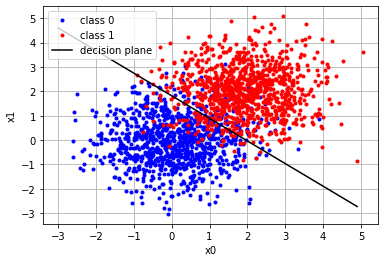

In [ ]:
m = -w1/w2
c = -w0/w2

x_tmp = np.arange(-3,5,0.1)
y_tmp = m*x_tmp +c

plt.plot(x[t[:,0]==-1, 0], x[t[:,0]==-1, 1],'b.')
plt.plot(x[t[:,0]==1,0],x[t[:,0]==1,1],'r.')
plt.plot(x_tmp,y_tmp,'k')
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(['class 0','class 1', 'decision plane'])

In [ ]:
y = model.predict(x)
y

63/63 [==============================] - 0s 2ms/step


array([[-0.9999121 ],
       [-0.4484301 ],
       [-0.9783592 ],
       ...,
       [ 0.82392263],
       [ 0.9940663 ],
       [ 0.9997584 ]], dtype=float32)

In [ ]:
detect = np.zeros(y.shape)
detect[y>0] = 1
detect[y<=0] =-1
detect

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [ ]:
np.sum(detect ==t)*100/len(t)

91.35

In [ ]:
labels = np.array(t, dtype=np.int64)
labels[labels==-1] = 0

predicts = np.array(detect, dtype=np.int64)
predicts[predicts==-1] = 0

tf.math.confusion_matrix(labels[:,0], predicts[:,0])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[901,  99],
       [ 74, 926]], dtype=int32)>

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(labels,predicts))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.90      0.93      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

